# Comparing DBSCAN and HDBSCAN Clustering Algorithms

This notebook demonstrates the differences between DBSCAN and HDBSCAN clustering algorithms using a synthetic dataset. Both are density-based clustering methods, but HDBSCAN extends DBSCAN with hierarchical clustering and improved handling of variable density clusters.

We will:
- Import required libraries
- Load and visualize sample data
- Apply DBSCAN and HDBSCAN
- Compare clustering results
- Visualize cluster assignments
- Analyze parameter sensitivity

**References:**
- [scikit-learn DBSCAN documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- [HDBSCAN documentation](https://hdbscan.readthedocs.io/en/latest/)
- [scikit-learn DBSCAN vs HDBSCAN example](https://scikit-learn.org/stable/auto_examples/cluster/plot_hdbscan.html)


## 1. Import Required Libraries

We will import numpy, matplotlib, scikit-learn, and hdbscan. If hdbscan is not installed, you may need to run `pip install hdbscan` in your environment.

In [ ]:
# Import required libraries
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

## 2. Load and Visualize Sample Data

We will generate a synthetic dataset with three clusters and some noise using `make_blobs`. This helps illustrate how DBSCAN and HDBSCAN handle clusters and outliers.

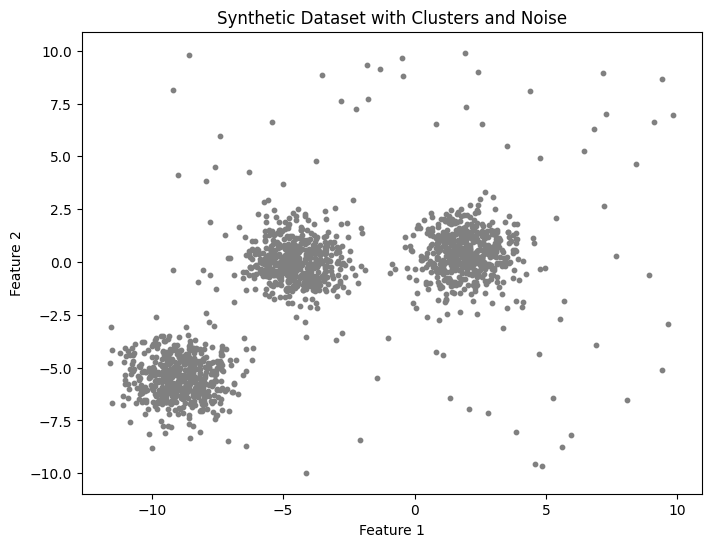

In [2]:
# Generate synthetic dataset
n_samples = 1500
random_state = 170
X, y_true = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=random_state)

# Add random noise
rng = np.random.RandomState(random_state)
X = np.concatenate([X, rng.uniform(low=-10, high=10, size=(100, 2))], axis=0)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, color='gray')
plt.title('Synthetic Dataset with Clusters and Noise')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 3. Apply DBSCAN Clustering

DBSCAN groups points that are closely packed together and marks points in low-density regions as outliers (noise). Let's apply DBSCAN and visualize the results.

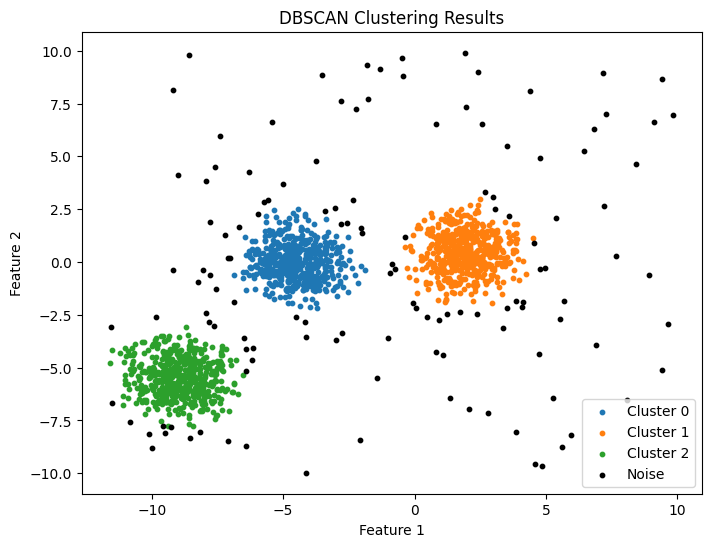

In [3]:
# Apply DBSCAN
# eps: max distance for two samples to be considered neighbors
# min_samples: min number of samples in a neighborhood for a point to be a core point

dbscan = DBSCAN(eps=0.6, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN results
plt.figure(figsize=(8, 6))
unique_labels = set(dbscan_labels)
colors = [plt.cm.tab10(i) for i in range(len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise
        col = 'black'
    class_member_mask = (dbscan_labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], s=10, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 4. Apply HDBSCAN Clustering

HDBSCAN is a hierarchical version of DBSCAN that can find clusters of varying densities and is less sensitive to parameter choices. Let's apply HDBSCAN and visualize the results.

/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


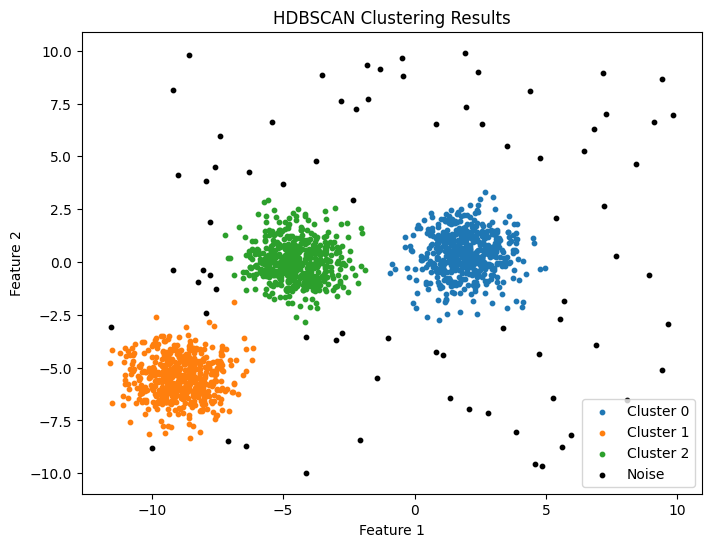

In [4]:
# Apply HDBSCAN
# min_cluster_size: minimum size of clusters
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
hdbscan_labels = hdbscan_clusterer.fit_predict(X)

# Visualize HDBSCAN results
plt.figure(figsize=(8, 6))
unique_labels = set(hdbscan_labels)
colors = [plt.cm.tab10(i) for i in range(len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'black'
    class_member_mask = (hdbscan_labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], s=10, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 5. Compare Clustering Results

Let's compare the number of clusters found, the number of noise points, and discuss cluster stability for both DBSCAN and HDBSCAN.

In [5]:
# Compare results
n_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_dbscan_noise = np.sum(dbscan_labels == -1)
n_hdbscan_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_hdbscan_noise = np.sum(hdbscan_labels == -1)

print(f"DBSCAN: {n_dbscan_clusters} clusters, {n_dbscan_noise} noise points")
print(f"HDBSCAN: {n_hdbscan_clusters} clusters, {n_hdbscan_noise} noise points")

# Cluster stability (HDBSCAN only)
if hasattr(hdbscan_clusterer, 'cluster_persistence_'):
    print("HDBSCAN cluster stability (persistence):", hdbscan_clusterer.cluster_persistence_)

DBSCAN: 3 clusters, 130 noise points
HDBSCAN: 3 clusters, 76 noise points
HDBSCAN cluster stability (persistence): [0.39844111 0.35677892 0.40645545]


## 6. Visualize Cluster Assignments Side by Side

Let's plot the cluster assignments for DBSCAN and HDBSCAN next to each other for direct comparison.

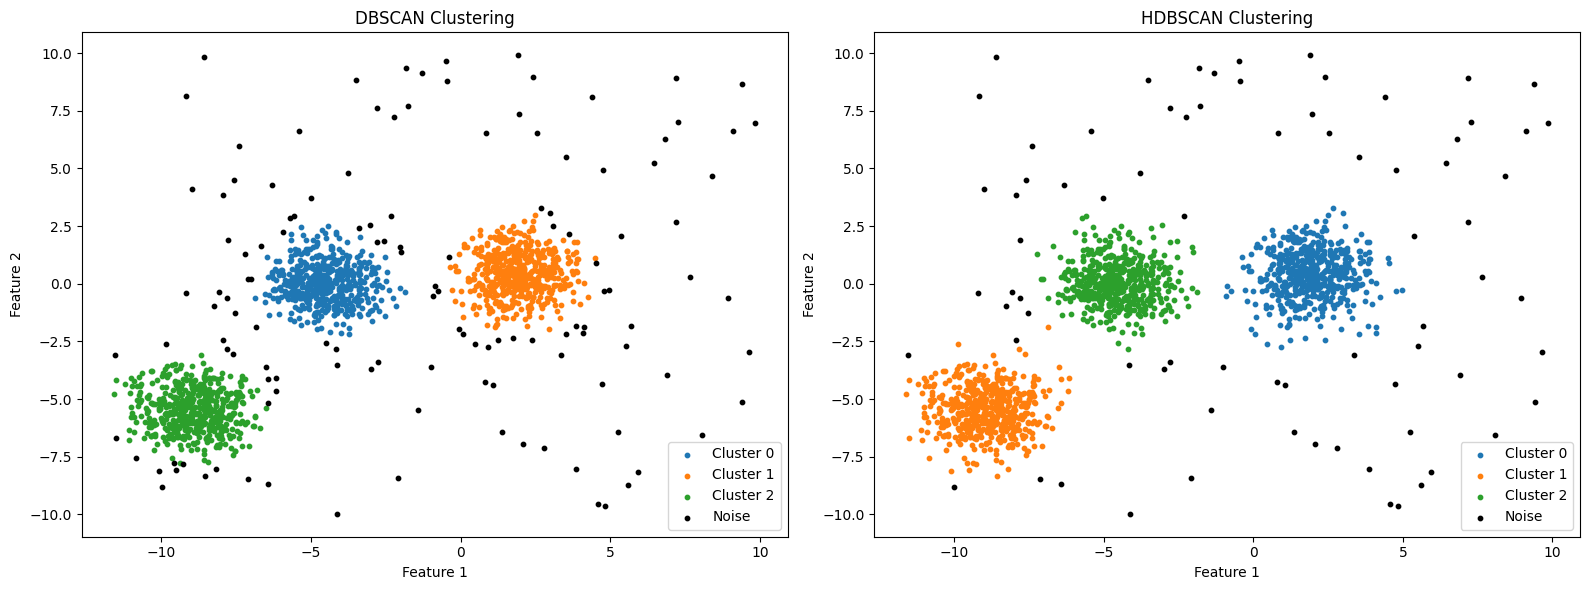

In [6]:
# Side-by-side cluster assignment plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# DBSCAN
unique_labels_dbscan = set(dbscan_labels)
colors_dbscan = [plt.cm.tab10(i) for i in range(len(unique_labels_dbscan))]
for k, col in zip(unique_labels_dbscan, colors_dbscan):
    if k == -1:
        col = 'black'
    class_member_mask = (dbscan_labels == k)
    axes[0].scatter(X[class_member_mask, 0], X[class_member_mask, 1], s=10, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')
axes[0].set_title('DBSCAN Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# HDBSCAN
unique_labels_hdbscan = set(hdbscan_labels)
colors_hdbscan = [plt.cm.tab10(i) for i in range(len(unique_labels_hdbscan))]
for k, col in zip(unique_labels_hdbscan, colors_hdbscan):
    if k == -1:
        col = 'black'
    class_member_mask = (hdbscan_labels == k)
    axes[1].scatter(X[class_member_mask, 0], X[class_member_mask, 1], s=10, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')
axes[1].set_title('HDBSCAN Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()

## 7. Parameter Sensitivity Analysis

Let's see how changing key parameters (e.g., `eps` for DBSCAN, `min_cluster_size` for HDBSCAN) affects clustering results.

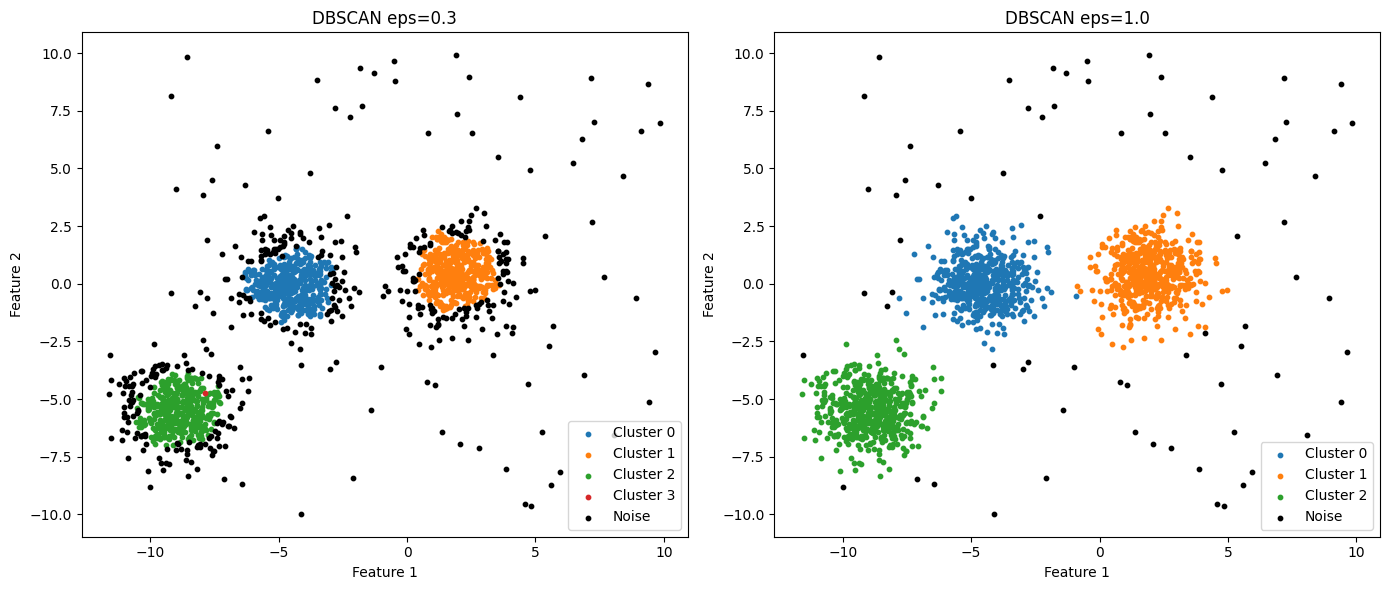

/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/jonas/.pyenv/versions/anomalyebook-3.11.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


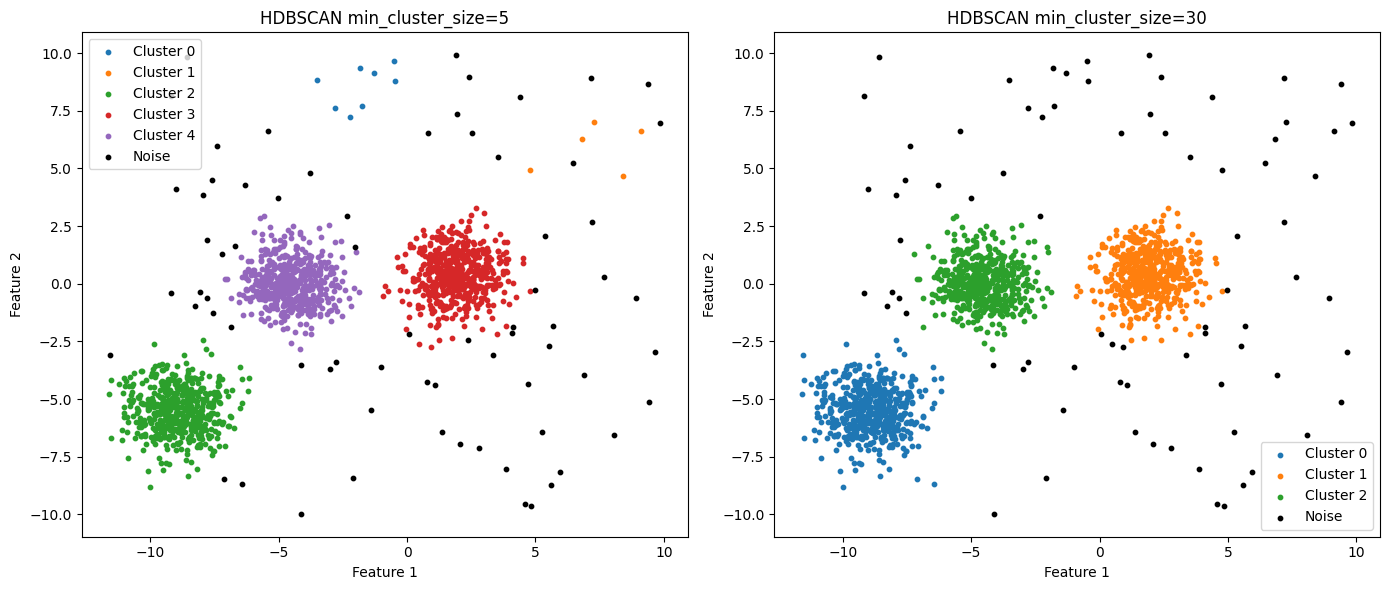

In [7]:
# DBSCAN parameter sensitivity
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, eps in zip(axes, [0.3, 1.0]):
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(X)
    unique_labels = set(labels)
    colors = [plt.cm.tab10(i) for i in range(len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'black'
        class_member_mask = (labels == k)
        ax.scatter(X[class_member_mask, 0], X[class_member_mask, 1], s=10, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')
    ax.set_title(f'DBSCAN eps={eps}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
plt.tight_layout()
plt.show()

# HDBSCAN parameter sensitivity
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, min_cluster_size in zip(axes, [5, 30]):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    labels = clusterer.fit_predict(X)
    unique_labels = set(labels)
    colors = [plt.cm.tab10(i) for i in range(len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'black'
        class_member_mask = (labels == k)
        ax.scatter(X[class_member_mask, 0], X[class_member_mask, 1], s=10, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')
    ax.set_title(f'HDBSCAN min_cluster_size={min_cluster_size}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
plt.tight_layout()
plt.show()

## Summary and Discussion

- **DBSCAN** is effective for finding clusters of similar density and marking noise, but is sensitive to the `eps` parameter and struggles with clusters of varying density.
- **HDBSCAN** extends DBSCAN with hierarchical clustering, better handling of variable density, and less sensitivity to parameter choices. It also provides cluster stability scores.

**When to use:**
- Use DBSCAN for simple, well-separated clusters with similar density.
- Use HDBSCAN for complex data with clusters of varying density or when parameter tuning is difficult.

**References:**
- [scikit-learn DBSCAN documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- [HDBSCAN documentation](https://hdbscan.readthedocs.io/en/latest/)
